## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import sklearn.metrics
import os

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv("train.csv") #Importing dataset

## Data Cleaning
### Treating null values

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
pd.options.display.max_rows = 4000    # In order to see all the columns in the query below
round(100*df.isnull().mean(),2)   # checking % of null values in all the columns

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Dealing with columns one by one as some of them have NA as values and not just missing values

In [8]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [9]:
df[df['LotFrontage'].isna()] #To see any high level patterns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500


#### There seems to be some correlation of LotFrontage with MSZoning and LotShape , Lets check this with a box plot

Text(0.5, 1.0, 'LotFrontage vs LotShape')

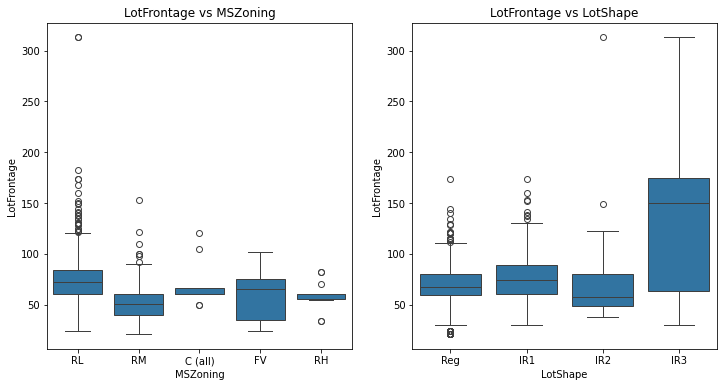

In [10]:
plt.figure(figsize=(12, 6))

# MSZoning vs LotFrontage
plt.subplot(1, 2, 1)
sns.boxplot(x='MSZoning', y='LotFrontage', data=df)
plt.title('LotFrontage vs MSZoning')

# LotShape vs LotFrontage
plt.subplot(1, 2, 2)
sns.boxplot(x='LotShape', y='LotFrontage', data=df)
plt.title('LotFrontage vs LotShape')

In [11]:
# Calculating the median 'LotFrontage' for each zoning classification
median_lotfrontage_per_zoning = df.groupby('MSZoning')['LotFrontage'].median()

# Imputing missing values in 'LotFrontage' based on their zoning classification
for zoning in median_lotfrontage_per_zoning.index:
    df.loc[(df['MSZoning'] == zoning) & (df['LotFrontage'].isna()), 'LotFrontage'] = median_lotfrontage_per_zoning[zoning]

In [12]:
round(100*df.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [13]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [14]:
# Replacing NA values in 'Alley' column with 'No_alley'
df['Alley'].fillna('No_alley', inplace=True)

# Checking the first few rows to confirm the change
df['Alley'].head()

0    No_alley
1    No_alley
2    No_alley
3    No_alley
4    No_alley
Name: Alley, dtype: object

In [15]:
round(100*df.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [16]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [17]:
# Replacing NA values in 'MasVnrType' column with 'No_Masonry_veneer'
df['MasVnrType'].fillna('No_Masonry_veneer', inplace=True)


In [18]:
round(100*df.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Now Since for all the MasVnrType = None , MasVnrArea =0 , we can replace NA values in MasVnrArea to 0

In [19]:
df['MasVnrArea'].fillna(0, inplace=True)

In [20]:
round(100*df.isnull().mean(),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Similarly Managing Na values of other columns and naming them appropriately

In [21]:
df['PoolQC'].fillna('No_Pool', inplace=True)
df['Fence'].fillna('No_Fence', inplace=True)
df['MiscFeature'].fillna('No_Misc_feature', inplace=True)

#For Garage

df['GarageCond'].fillna('No_Garage(GarageCond)', inplace=True)
df['GarageQual'].fillna('No_Garage(GarageQual)', inplace=True)
df['GarageFinish'].fillna('No_Garage(GarageFinish)', inplace=True)
df['GarageYrBlt'].fillna('No_Garage(GarageYrBlt)', inplace=True)
df['GarageType'].fillna('No_Garage(GarageType)', inplace=True)

#For fire place
df['FireplaceQu'].fillna('No_Fireplace', inplace=True)

#For Basement

df['BsmtFinType2'].fillna('No_Basement(BsmtFinType2)', inplace=True)
df['BsmtFinType1'].fillna('No_Basement(BsmtFinType1)', inplace=True)
df['BsmtExposure'].fillna('No_Basement(BsmtExposure)', inplace=True)
df['BsmtCond'].fillna('No_Basement(BsmtCond)', inplace=True)
df['BsmtQual'].fillna('No_Basement(BsmtQual)', inplace=True)

In [22]:
round(100*df.isnull().mean(),2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In [23]:
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [24]:
df[df['Electrical'].isna()] #To see any high level patterns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No_alley,Reg,Lvl,AllPub,...,0,No_Pool,No_Fence,No_Misc_feature,0,5,2008,WD,Normal,167500


In [25]:
df['Electrical'].fillna(df['Electrical'].mode()[0] , inplace=True) # Replacing NA values in 'Electrical' column with its mode

In [26]:
round(100*df.isnull().mean(),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

Before we move on to the next step , we should check the correlation between Independent variables

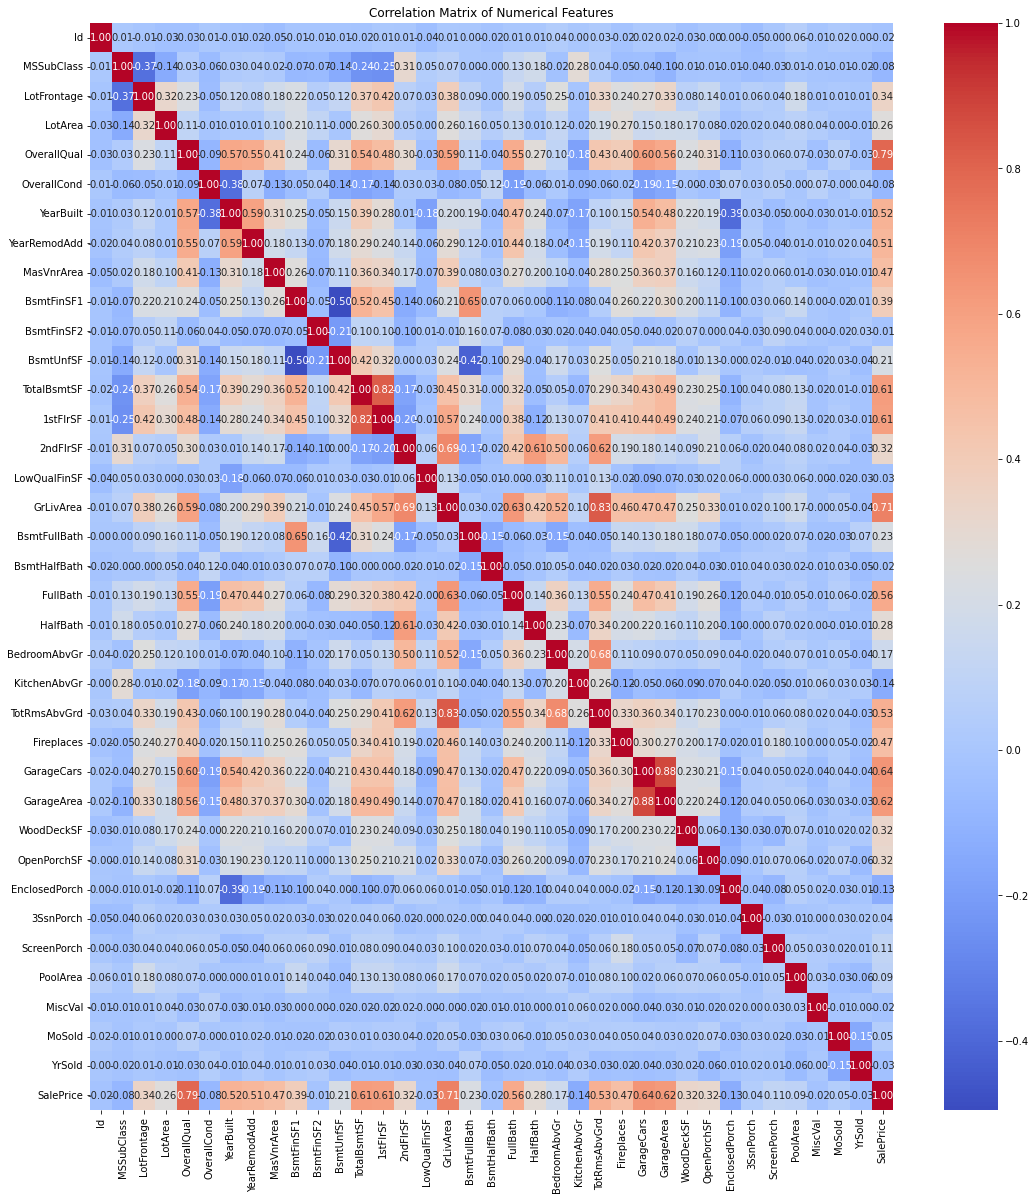

In [27]:
# Calculating correlation matrix for numerical features
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the heatmap
plt.figure(figsize=(18, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### Dropping a column from each pair having high correlation amongst them , here we are choosing from the following :
#### "GarageCars" and "GarageArea" , "GrLivArea" and "TotRmsAbvGrd" , "TotalBsmtSF" and "1stFlrSF"

In [28]:
df.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF','Id'], axis=1, inplace=True) #Additionally dropping column Id

In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_alley,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_Misc_feature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No_alley,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_Misc_feature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No_alley,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_Misc_feature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No_alley,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,No_Misc_feature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No_alley,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_Misc_feature,0,12,2008,WD,Normal,250000


### Feature encoding

#### As the next step We will create more intutive encoding for the features

In [30]:
mssubclass_mapping = {
    20: '1Story1946New',
    30: '1Story1945Old',
    40: '1StoryFinAttic',
    45: '1HalfStoryUnf',
    50: '1HalfStoryFin',
    60: '2Story1946New',
    70: '2Story1945Old',
    75: '2HalfStory',
    80: 'SplitMultiLevel',
    85: 'SplitFoyer',
    90: 'Duplex',
    120: '1StoryPUD1946New',
    150: '1HalfStoryPUD',
    160: '2StoryPUD1946New',
    180: 'PUDMultiLevel',
    190: '2FamilyConversion'
}
df['MSSubClass'] = df['MSSubClass'].map(mssubclass_mapping)

In [31]:
# df['MSZoning'] = df['MSZoning'].apply(lambda x: f"{x}-MSZoning")

In [32]:
paveddrive_mapping = {
    'Y': 'PavedDrive',
    'P': 'PartiallyPavedDrive',
    'N': 'Dirt/Gravel_Drive'
}

df['PavedDrive'] = df['PavedDrive'].map(paveddrive_mapping)

In [33]:
# for col in ['OverallQual','OverallCond','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']:
#     df[col] = df[col].apply(lambda x: f"{x}-{col}")

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2Story1946New,RL,65.0,8450,Pave,No_alley,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_Misc_feature,0,2,2008,WD,Normal,208500
1,1Story1946New,RL,80.0,9600,Pave,No_alley,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_Misc_feature,0,5,2007,WD,Normal,181500
2,2Story1946New,RL,68.0,11250,Pave,No_alley,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_Misc_feature,0,9,2008,WD,Normal,223500
3,2Story1945Old,RL,60.0,9550,Pave,No_alley,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,No_Misc_feature,0,2,2006,WD,Abnorml,140000
4,2Story1946New,RL,84.0,14260,Pave,No_alley,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_Misc_feature,0,12,2008,WD,Normal,250000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Performing EDA

#### Visualzing a few columns on the basis on correlation done earlier :

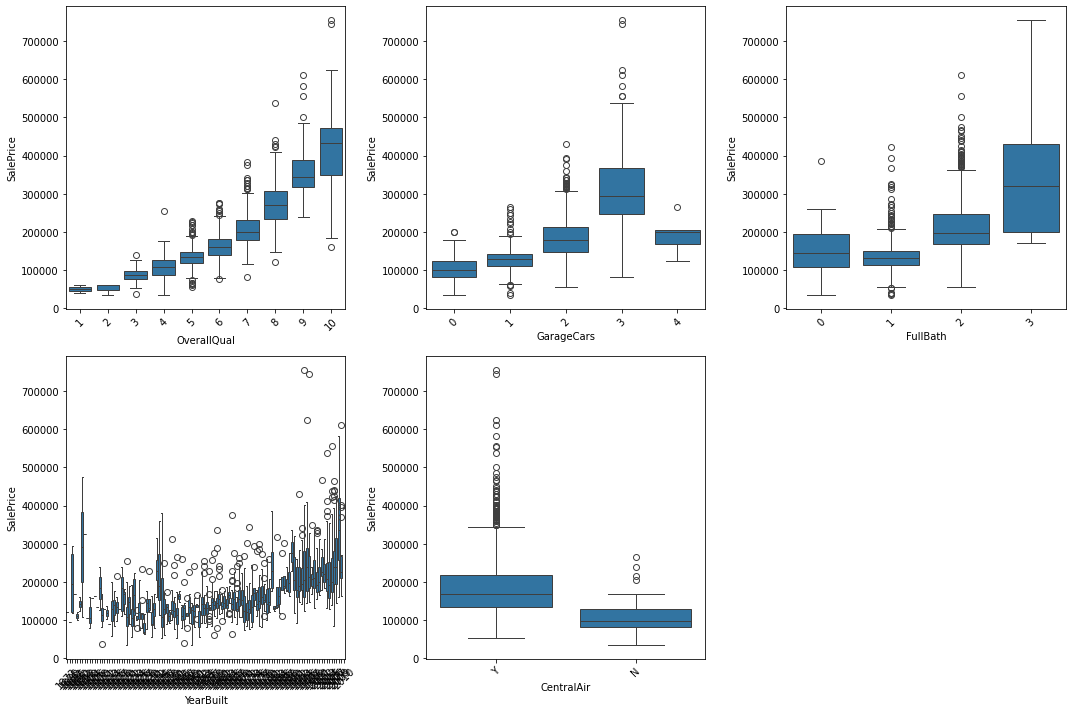

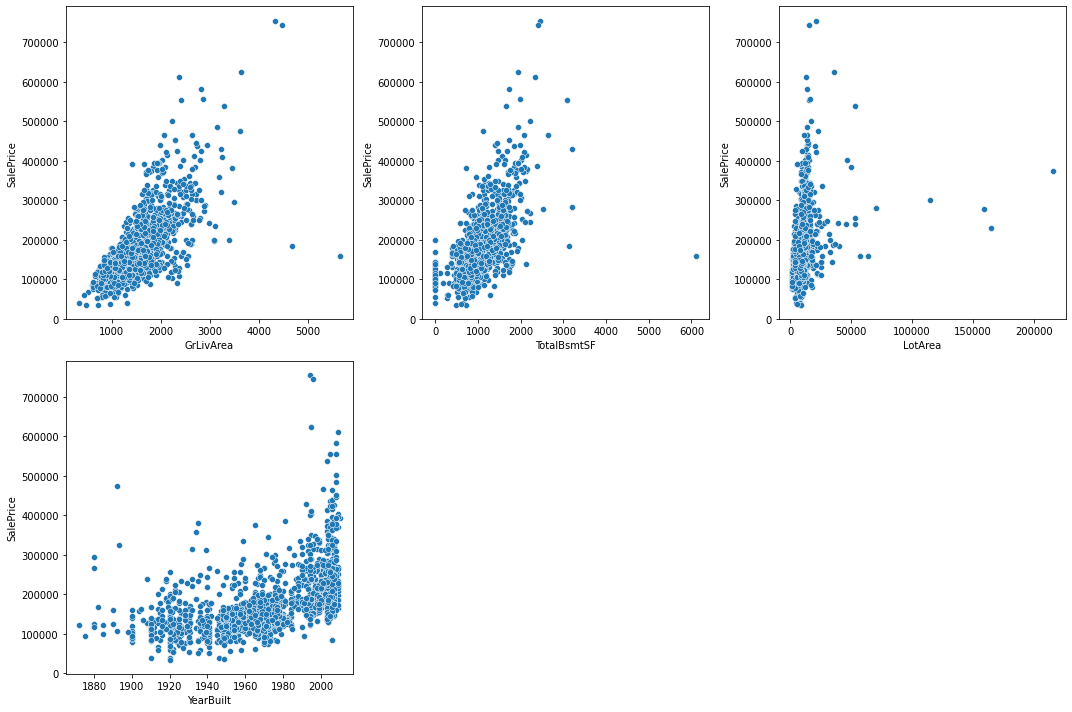

In [36]:
# Box plots for categorical variables
categorical_vars = ['OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'CentralAir']
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plots for numerical variables
numerical_vars = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'YearBuilt']
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='SalePrice', data=df)
plt.tight_layout()
plt.show()

### Data preparation

#### Now creating dummy variables

In [37]:
# Selecting only the categorical variables excluding 'GarageYrBlt'
categorical_cols = df.select_dtypes(include=['object']).columns.difference(['GarageYrBlt'])

# Creating dummy variables for all categorical columns (excluding 'GarageYrBlt')
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True ,dtype=int)

# Check if everything is as expected
print(df_dummies.head())

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_CWD  \
0       196.0         706           0        150  ...             0   
1         0.0         978           0        284  ...             0   
2       162.0         486           0        434  ...             0   
3         0.0         216           0        540  ...             0   
4       350.0         655           0        490  ...             0   

   SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0             0        

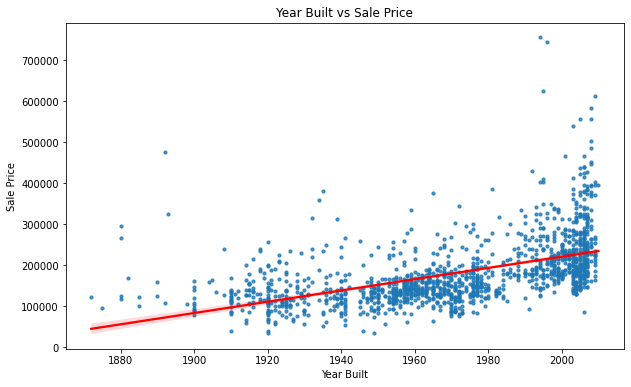

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='YearBuilt', y='SalePrice', data=df, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

In [39]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 270 entries, LotFrontage to Utilities_NoSeWa
dtypes: float64(2), int32(237), int64(30), object(1)
memory usage: 1.7+ MB


#### Now We can further reduce the columns which give the same information
#### For example columns stating absence of Basement or absence of Gararage

In [40]:
# Creating a copy of df_dummies into df
df = df_dummies.copy()

# Create a boolean column for Garage presence
df['HasGarage'] = (~df['GarageType_No_Garage(GarageType)'].astype(bool)).astype(int)

# Create a boolean column for Basement presence
df['HasBasement'] = (~df['BsmtQual_No_Basement(BsmtQual)'].astype(bool)).astype(int)

# Drop the 'No Garage' and 'No Basement' columns
columns_to_drop = [
    'GarageCond_No_Garage(GarageCond)', 'GarageFinish_No_Garage(GarageFinish)',
    'GarageQual_No_Garage(GarageQual)', 'GarageType_No_Garage(GarageType)',
    'BsmtCond_No_Basement(BsmtCond)', 'BsmtExposure_No_Basement(BsmtExposure)',
    'BsmtFinType1_No_Basement(BsmtFinType1)', 'BsmtFinType2_No_Basement(BsmtFinType2)',
    'BsmtQual_No_Basement(BsmtQual)'
]
df.drop(columns=columns_to_drop, inplace=True)

In [41]:
df['GarageYrBlt'] = df['GarageYrBlt'].replace('No_Garage(GarageYrBlt)', 0.0)

# Converting the 'GarageYrBlt' column to float
df['GarageYrBlt'] = df['GarageYrBlt'].astype(float)

In [42]:
df.to_csv("Test3.csv")

#### Now We will Scale the numerical columns in the dataset except SalePrice

We are statndard scaler as there could a wide range of outliers in the dataset

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Identify the numerical columns (excluding 'SalePrice')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('SalePrice')  # Exclude the target variable

# Apply Min-Max scaling to the numerical columns
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Check the first few rows of the scaled columns
df.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,HasGarage,HasBasement
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,...,0,0,0,0,0,1,1,0,1,1
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,...,0,0,0,0,0,1,1,0,1,1
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,...,0,0,0,0,0,1,1,0,1,1
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,...,0,0,0,0,0,1,1,0,1,1
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,...,0,0,0,0,0,1,1,0,1,1


### Spliting the data for Model building

In [44]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and features (X)
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# Split the data into a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
# num of max features
len(X_train.columns)

262

#### RFE + Cross-Validation in sklearn

Let's now experiment with k-fold CV.

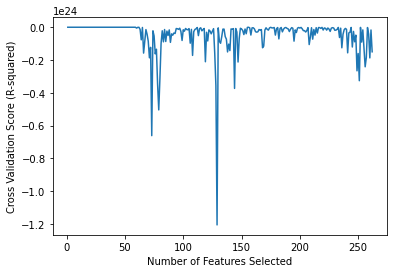

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Initialize the base model
base_model = LinearRegression()

# Initialize RFECV
folds = KFold(n_splits=5, shuffle=True, random_state=100)
rfecv = RFECV(estimator=base_model, step=1, cv=folds, scoring='r2')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Plot the number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross Validation Score (R-squared)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Model Building

In [47]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [49]:
print(lm.intercept_)
print(lm.coef_)

1.5397135259107842e+16
[ 1.67353779e+04  1.61918689e+05  6.53061878e+04  3.88009951e+04
  4.82477787e+04  7.28595997e+03  3.89847100e+04 -1.17920621e+16
 -3.07964201e+15 -4.88062669e+15  1.27656803e+16  3.49983750e+04
 -6.62443750e+03  2.28330688e+05  1.27276875e+04  3.45493750e+03
  1.27209062e+04  1.72162500e+03 -2.24204375e+04 -5.71184375e+03
  8.69600000e+03 -4.41388125e+04  3.45370000e+04  1.42270000e+04
 -2.44718750e+03  9.95937500e+03  2.30250938e+04  2.51694688e+04
  5.19497306e+06  1.06372078e+05 -6.09604688e+03 -9.79981445e+02
 -2.99762500e+03  1.03613750e+04 -4.16488750e+04  1.76194016e+16
 -9.12400696e+16 -9.12400696e+16  2.54800000e+03  4.22498281e+04
  8.61300000e+03  1.43172500e+04 -4.53931250e+03 -5.19537500e+03
  1.84400000e+03  3.85350000e+03 -2.57482812e+03  1.68581250e+03
  1.44250000e+02 -1.76942500e+04 -7.52059375e+03 -1.19926875e+04
 -8.54437500e+03 -9.03325000e+03 -1.30528750e+04 -2.18760000e+04
 -1.98538750e+04  3.66250000e+01  9.67507812e+03  1.51383203e+04
  

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9400069945484226
-8.301958078702894e+21
369016024336.0
2.5374146740188433e+34
361072430.85714287
5.793184187257633e+31


#### Clearly this is a case of over fitting , we will use regularization method to solve them !!!

### Regularization

#### Ridge and Lasso Regression

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_cv.best_params_)

{'alpha': 5.0}


In [54]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.50000337e+02  2.13356891e+04  6.00322189e+04  2.20293574e+04
  6.18802220e+03  1.08119186e+04  1.50353857e+04  1.54503363e+04
  9.82629663e+03  1.53712830e+04  2.25193088e+04  5.21845198e+04
  7.65827183e+03  5.81217934e+04  2.10186990e+04 -1.99763788e+03
  3.61969682e+04  1.23099615e+04  1.45908990e+04 -5.94677346e+03
  1.89922456e+04  1.16443950e+03  4.59464387e+04  1.65024255e+04
 -1.35832975e+03  1.66923127e+03  1.22630519e+04  1.83468591e+04
  1.41093826e+04 -9.15085071e+00 -5.68630918e+02 -2.49959742e+03
 -1.80294784e+03  6.89978337e+03 -5.80224829e+03 -5.06076615e+03
 -1.59713462e+04 -1.57094991e+04  4.81430644e+03 -1.49964993e+03
  1.16036926e+04  1.90076911e+04 -3.91871359e+03 -8.51334821e+03
  8.24439533e+02  6.99006685e+03 -2.77676575e+03  1.87563378e+03
 -8.11241585e+03 -5.15213432e+02  8.01093634e+02 -1.50593837e+02
 -5.08690686e+02  1.33299153e+03 -1.73786537e+04 -2.81718204e+04
 -2.78131257e+04  6.28158213e+03 -1.50920535e+03  1.03343804e+04
  2.36144040e+03  2.38478

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8934052641831653
0.8599038181897848
655662528159.6113
428190679992.92126
641548461.9957058
977604292.2212814


#### Lasso

In [56]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [58]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [59]:
lasso.coef_

array([-0.00000000e+00,  2.89921538e+04,  9.07223883e+04,  2.70294384e+04,
        1.05492204e+04,  7.52162606e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.29459787e+04,
       -0.00000000e+00,  1.94457581e+05,  2.03847675e+04,  0.00000000e+00,
        2.20160296e+04,  6.06827928e+03, -0.00000000e+00, -0.00000000e+00,
        1.60483194e+04, -0.00000000e+00,  4.75898621e+04,  1.43742529e+04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.64897226e+04,
        1.57058349e+04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -9.38797636e+03,
       -2.04382603e+04, -2.02852263e+04,  0.00000000e+00,  0.00000000e+00,
        9.20333078e+03,  2.00141750e+04, -2.09933426e+03, -6.30018056e+03,
       -0.00000000e+00,  3.67415960e+03, -1.77707653e+03,  0.00000000e+00,
       -7.38663007e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [60]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8969445001531264
0.8720388934589949
633892743882.4061
391100974448.1448
620247303.2117476
892924599.1966776


### Comparing the models 

In [61]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.400070e-01,8.934053e-01,8.969445e-01
1,R2 Score (Test),-8.301958e+21,8.599038e-01,8.720389e-01
2,RSS (Train),3.690160e+11,6.556625e+11,6.338927e+11
3,RSS (Test),2.537415e+34,4.281907e+11,3.911010e+11
4,MSE (Train),1.900191e+04,2.532881e+04,2.490476e+04
5,MSE (Test),7.611297e+15,3.126666e+04,2.988184e+04


#### Lets observe the changes in the coefficients after regularization

In [62]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [63]:
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
LotFrontage,1.673538e+04,-650.000337,-0.000000
LotArea,1.619187e+05,21335.689102,28992.153837
OverallQual,6.530619e+04,60032.218891,90722.388338
OverallCond,3.880100e+04,22029.357364,27029.438385
YearBuilt,4.824778e+04,6188.022198,10549.220363
YearRemodAdd,7.285960e+03,10811.918649,7521.626061
MasVnrArea,3.898471e+04,15035.385731,0.000000
BsmtFinSF1,-1.179206e+16,15450.336322,0.000000
BsmtFinSF2,-3.079642e+15,9826.296631,0.000000
BsmtUnfSF,-4.880627e+15,15371.283046,0.000000
